In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
filename = 'android-studio-data.csv'
studio_data = pd.read_csv(filename,header=None)
studio_data = studio_data.rename(columns={0:"app",1:"laptop",2:"step",3:"time"})
studio_data['app'] = studio_data['app'].replace({"fieldday":"Field Day","majortom":"Major Tom"})
studio_data.index.names=['id']
studio_data

,app,laptop,step,time
id,,,,
0,Field Day,old,synced successfully,64.736
1,Field Day,old,completed successfully,4.705
2,Field Day,old,build and install,59.349
3,Major Tom,old,synced successfully,61.274
4,Major Tom,old,completed successfully,2.674
5,Major Tom,old,build and install,96.861
6,Field Day,new,synced successfully,15.363
7,Field Day,new,completed successfully,1.368
8,Field Day,new,build and install,11.600


In [51]:
old_data = studio_data.loc[studio_data['laptop']=='old'].drop(columns='laptop')
new_data = studio_data.loc[studio_data['laptop']=='new'].drop(columns='laptop')

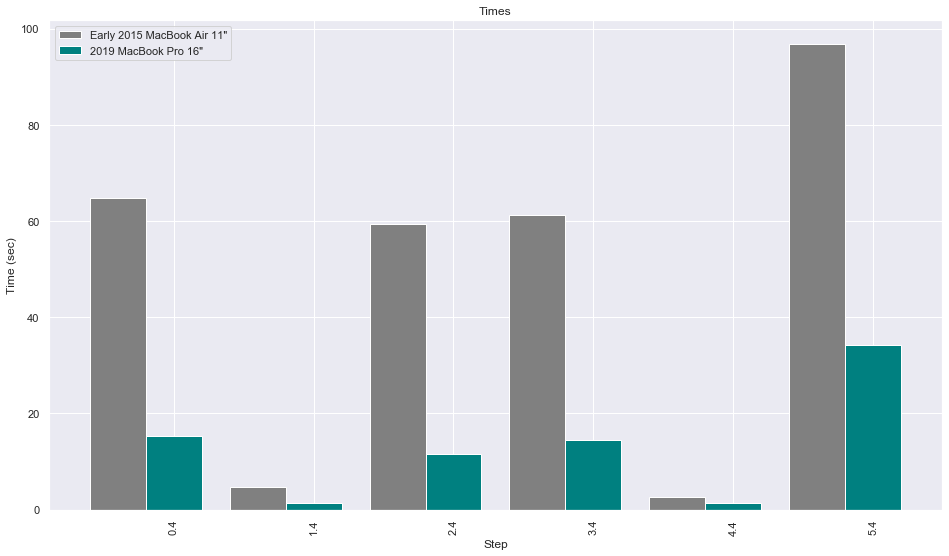

In [58]:
sns.set()

fig, ax = plt.subplots(figsize=(16,9))
index_new = new_data.index.values-6
index_old = old_data.index.values
bar_width = .4

bars_old = plt.bar(index_old, old_data['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index_new + bar_width, new_data['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')

plt.xlabel('Step')
plt.ylabel('Time (sec)')
plt.title('Times')
plt.xticks(index_old + bar_width, rotation='vertical')
plt.legend()
plt.show()

To do
- use the step string rather than an arbitrary number as the tick marks on x axis
- better data model? maybe too small a dataset to bother (this was wrong, because of the number of ways I want to cut the data)

In [80]:
old_fieldday = studio_data[(studio_data.laptop=='old') & (studio_data.app=='Field Day')][['step','time']].reset_index(drop=True)
old_majortom = studio_data[(studio_data.laptop=='old') & (studio_data.app=='Major Tom')][['step','time']].reset_index(drop=True)
new_fieldday = studio_data[(studio_data.laptop=='new') & (studio_data.app=='Field Day')][['step','time']].reset_index(drop=True)
new_majortom = studio_data[(studio_data.laptop=='new') & (studio_data.app=='Major Tom')][['step','time']].reset_index(drop=True)

In [81]:
new_fieldday

,step,time
0,synced successfully,15.363
1,completed successfully,1.368
2,build and install,11.600


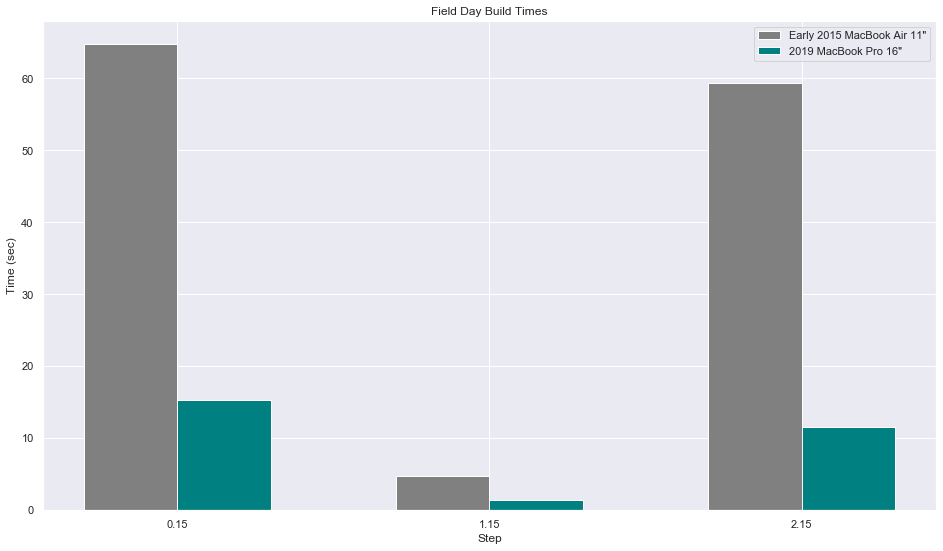

In [94]:
sns.set()

fig, ax = plt.subplots(figsize=(16,9))
index = new_fieldday.index
bar_width = 0.3

bars_old = plt.bar(index, old_fieldday['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index + bar_width, new_fieldday['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')

plt.xlabel('Step')
plt.ylabel('Time (sec)')
plt.title('Field Day Build Times')
plt.xticks(index+0.5*bar_width)
plt.legend()
plt.show()

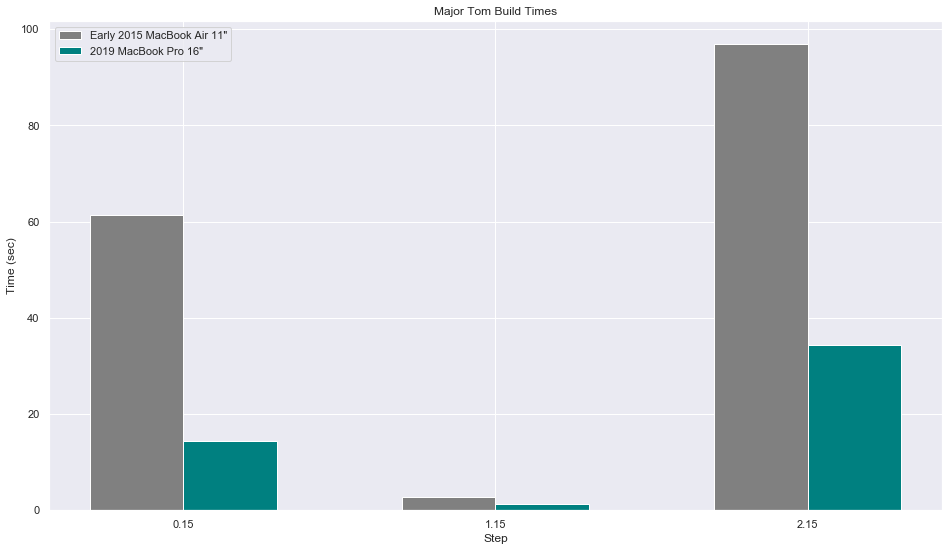

In [96]:
sns.set()

fig, ax = plt.subplots(figsize=(16,9))
index = new_majortom.index
bar_width = 0.3

bars_old = plt.bar(index, old_majortom['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index + bar_width, new_majortom['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')

plt.xlabel('Step')
plt.ylabel('Time (sec)')
plt.title('Major Tom Build Times')
plt.xticks(index+0.5*bar_width)
plt.legend()
plt.show()